In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,r2_score,classification_report,accuracy_score

In [321]:
gender =pd.read_csv("voice.csv")
gender.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [322]:
gender.shape

(3168, 21)

In [323]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [324]:
gender.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [325]:
(gender==0).sum()

meanfreq      0
sd            0
median        0
Q25           0
Q75           0
IQR           0
skew          0
kurt          0
sp.ent        0
sfm           0
mode        236
centroid      0
meanfun       0
minfun        0
maxfun        0
meandom       0
mindom        0
maxdom        0
dfrange      65
modindx      65
label         0
dtype: int64

In [326]:
to_do=['mode','dfrange','modindx']
for col in to_do:
    gender[col] = gender[col].replace(0,gender[col].mean())
gender.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,4.994630,0.173752,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [327]:
gender.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.177594,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,5.097108,0.177316
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.061424,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.445021,0.116778
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000728,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.007812,0.019881
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.153321,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.695312,0.103471
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.994630,0.143080
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [328]:
gender['label'] = gender['label'].map({'male':0,'female':1})

In [329]:
gender.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.477351,-0.272697,0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.426256,0.187158,-0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.410112,-0.254100,0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.403693,-0.206805,0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.324431,-0.240448,-0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.280072,0.102452,-0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.148016,-0.005661,-0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.112480,-0.039698,-0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.359576,0.168158,-0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.429758,0.227839,-0.357499


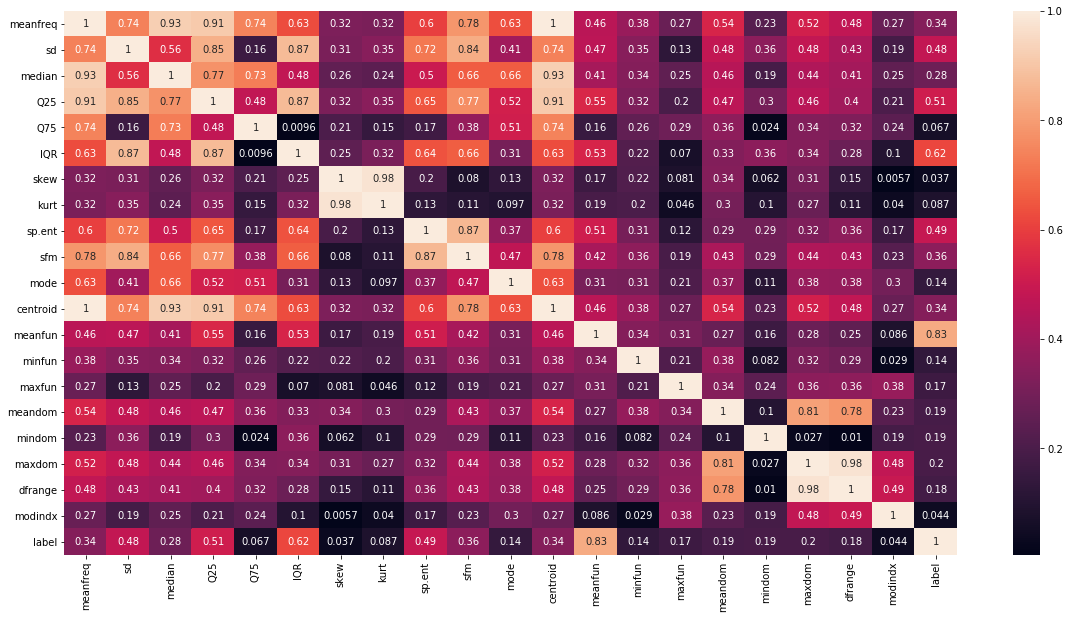

In [330]:
plt.figure(figsize=(20,10))
sns.heatmap(gender.corr().abs(),annot=True)
plt.show()

In [331]:
gender = gender.drop(['dfrange','meanfreq','skew','median','centroid'], axis=1)

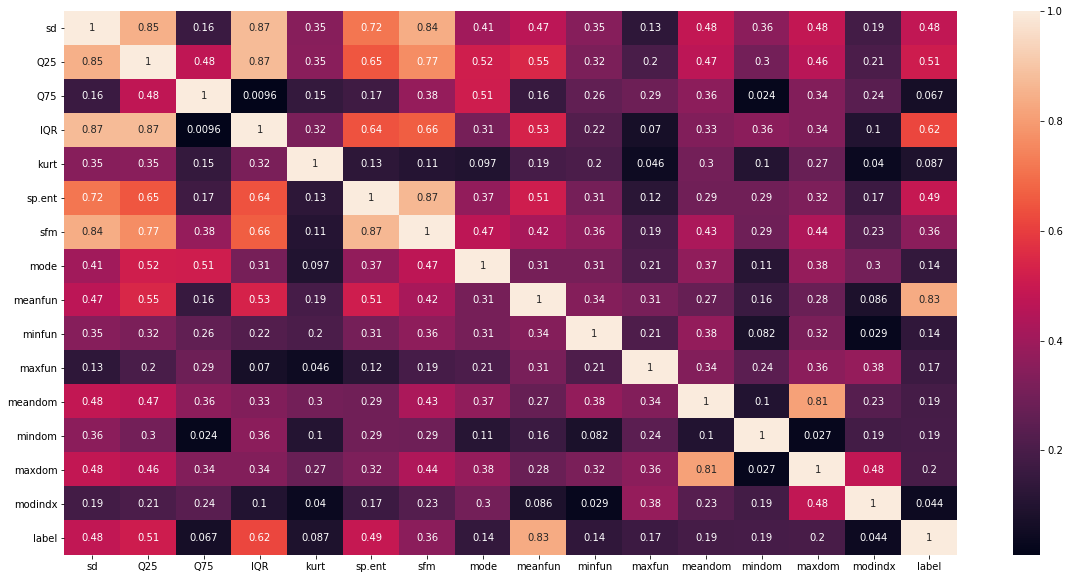

In [332]:
plt.figure(figsize=(20,10))
sns.heatmap(gender.corr().abs(),annot=True)
plt.show()

In [333]:
gender.corr()

,sd,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label
sd,1.000000,-0.846931,-0.161076,0.874660,0.346241,0.716620,0.838086,-0.405369,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,0.187158,-0.479539
Q25,-0.846931,1.000000,0.477140,-0.874189,-0.350182,-0.648126,-0.766875,0.520267,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,-0.206805,0.511455
Q75,-0.161076,0.477140,1.000000,0.009636,-0.148881,-0.174905,-0.378198,0.514682,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,-0.240448,-0.066906
IQR,0.874660,-0.874189,0.009636,1.000000,0.316185,0.640813,0.663601,-0.307593,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,0.102452,-0.618916
kurt,0.346241,-0.350182,-0.148881,0.316185,1.000000,-0.127644,0.109884,-0.097063,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.039698,-0.087195
sp.ent,0.716620,-0.648126,-0.174905,0.640813,-0.127644,1.000000,0.866411,-0.371398,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,0.168158,-0.490552
sfm,0.838086,-0.766875,-0.378198,0.663601,0.109884,0.866411,1.000000,-0.472031,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,0.227839,-0.357499
mode,-0.405369,0.520267,0.514682,-0.307593,-0.097063,-0.371398,-0.472031,1.000000,0.309719,0.308039,0.209235,0.369264,0.113318,0.380697,-0.300525,0.144541
meanfun,-0.466281,0.545035,0.155091,-0.534462,-0.194560,-0.513194,-0.421066,0.309719,1.000000,0.339387,0.311950,0.270840,0.162163,0.277982,-0.086160,0.833921
minfun,-0.345609,0.320994,0.258002,-0.222680,-0.203201,-0.305826,-0.362100,0.308039,0.339387,1.000000,0.213987,0.375979,0.082015,0.317860,-0.028537,0.136692


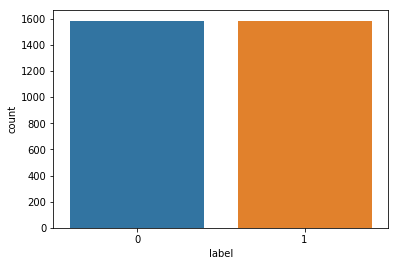

In [334]:
sns.countplot(gender['label'])


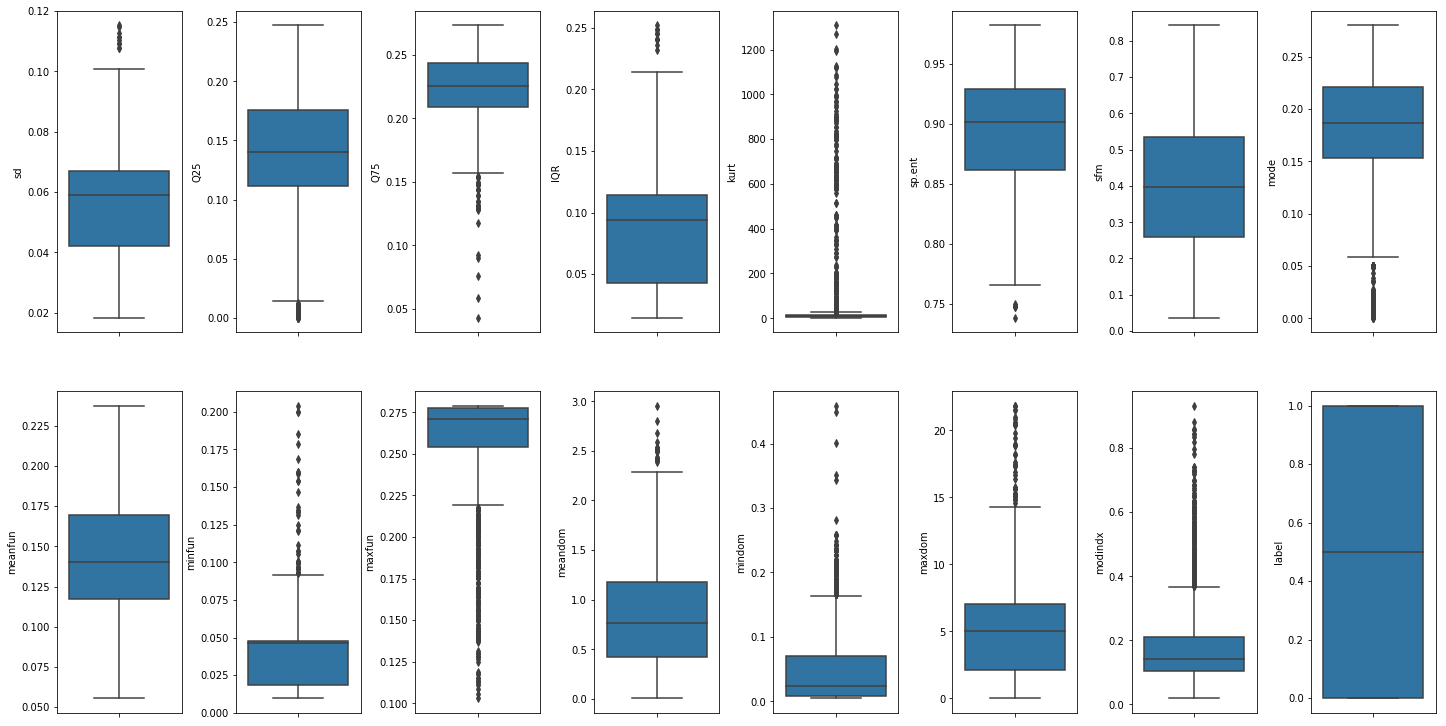

In [335]:
import seaborn as sns
_,axs=plt.subplots(ncols=8,nrows=2,figsize=(20,10))
index=0
axs=axs.flatten()
for k,v in gender.items():
    sns.boxplot(y=v,data=gender,ax=axs[index])
    index+=1
plt.tight_layout(pad=0.4,w_pad=0.1,h_pad=5.0)
plt.show()


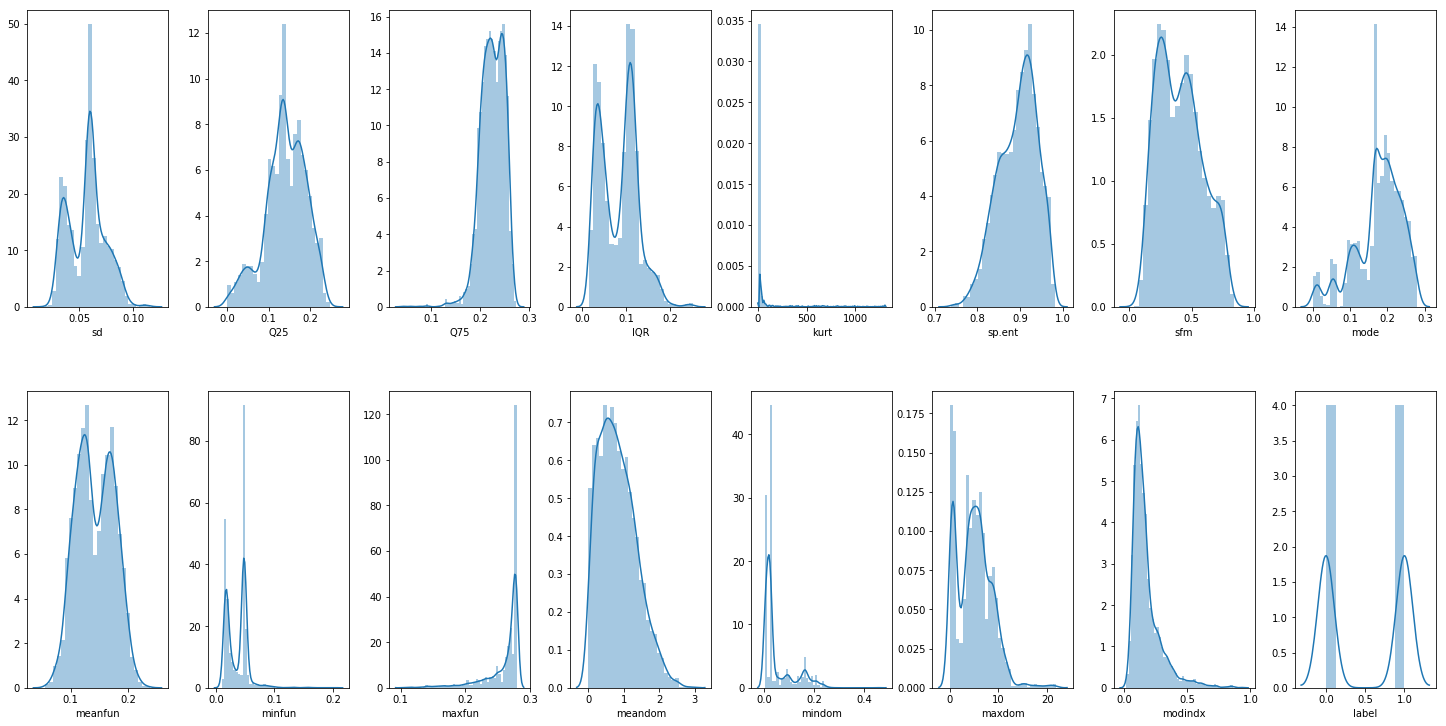

In [336]:

import seaborn as sns
_,axs=plt.subplots(ncols=8,nrows=2,figsize=(20,10))
index=0
axs=axs.flatten()
for k,v in gender.items():
    sns.distplot(v,ax=axs[index])
    index+=1
plt.tight_layout(pad=0.4,w_pad=0.1,h_pad=5.0)
plt.show()

In [337]:
gender = gender.drop(['kurt'],axis=1)

In [338]:
gender.describe()

,sd,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.057126,0.140456,0.224765,0.084309,0.895127,0.408216,0.177594,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,0.177316,0.500000
std,0.016652,0.048680,0.023639,0.042783,0.044980,0.177521,0.061424,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,0.116778,0.500079
min,0.018363,0.000229,0.042946,0.014558,0.738651,0.036876,0.000728,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.019881,0.000000
25%,0.041954,0.111087,0.208747,0.042560,0.861811,0.258041,0.153321,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,0.103471,0.000000
50%,0.059155,0.140286,0.225684,0.094280,0.901767,0.396335,0.186599,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,0.143080,0.500000
75%,0.067020,0.175939,0.243660,0.114175,0.928713,0.533676,0.221104,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,0.209183,1.000000
max,0.115273,0.247347,0.273469,0.252225,0.981997,0.842936,0.280000,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,0.932374,1.000000


In [347]:
x = gender.iloc[:,:14]
y = gender.iloc[:,14]

In [348]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)


In [349]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly',random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

C:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


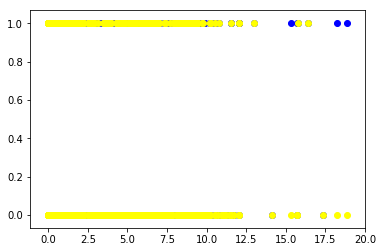

In [350]:
plt.scatter(x_test,[y_test]*14,color="Blue")
plt.scatter(x_test,[y_pred]*14,color = "yellow")
plt.show()

In [351]:
from sklearn.metrics import confusion_matrix,r2_score,classification_report,accuracy_score
accuracy_score(y_pred,y_test)

0.8012618296529969

In [352]:
classifier.score(x_train,y_train)


0.7936069455406471

In [345]:
classifier = DecisionTreeClassifier(min_samples_split=0.15)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [346]:
accuracy_score(y_pred,y_test)


0.9353312302839116

In [296]:
classifier.score(x_train,y_train)

0.9577742699289661

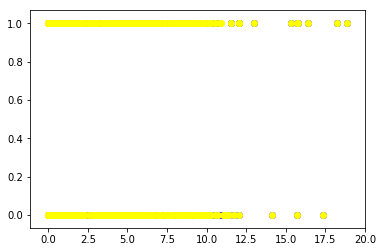

array([[296,   4],
       [ 37, 297]], dtype=int64)

In [297]:
plt.scatter(x_test,[y_test]*14,color="Blue")
plt.scatter(x_test,[y_pred]*14,color = "yellow")
plt.show()
confusion_matrix(y_pred,y_test)

In [298]:
confusion_matrix(y_pred,y_test)


array([[296,   4],
       [ 37, 297]], dtype=int64)

In [299]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       300
           1       0.99      0.89      0.94       334

   micro avg       0.94      0.94      0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634

